# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import tensorflow as tf

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

import nltk
import re
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
# version check of TensorFlow

print(f"TensorFlow Keras version: {tf.__version__}")

TensorFlow Keras version: 2.19.0


# Loading the dataset from Kaggle:

Dataset - https://www.kaggle.com/datasets/ronikdedhia/fake-news

In [3]:
!pip install kaggle

!pip install opendatasets

In [4]:
import opendatasets as od

When we are using `kaggle.json` file we don't need to give our `username` and `key`.

And if we are not using `kaggle.json` file we need to give our `username` and `key`, it's compulsory.

In [5]:
od.download("https://www.kaggle.com/datasets/ronikdedhia/fake-news")

Dataset URL: https://www.kaggle.com/datasets/ronikdedhia/fake-news


100%|██████████| 37.0M/37.0M [00:00<00:00, 594MB/s]

# Displaying of the Dataset:

In [6]:
df = pd.read_csv("/content/fake-news/fake_news.csv")

In [7]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [8]:
df.head() # display the first few rows of the DataFrame (by default first 5 rows will print)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
df.tail() # display the last few rows of the DataFrame (by default last 5 rows will print)

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [10]:
df.info()    # provides a concise summary of a DataFrame, it includes details such as the number of non-null entries,
             # the data type of each column, and the memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [11]:
df.describe()  # provides summary statistics for numerical columns

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [12]:
df.isnull()  # returns a DataFrame with True/False values indicating missing values (False (0) - no NULL value & True (1) - NULL value)

,id,title,author,text,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
20795,False,False,False,False,False
20796,False,False,False,False,False
20797,False,False,False,False,False
20798,False,False,False,False,False


In [13]:
df.isnull().sum()  # returns the number of missing values in each column

,0
id,0
title,558
author,1957
text,39
label,0


In [14]:
df = df.dropna()  # removes rows with missing values

In [15]:
print("After removing the rows with missing values: ")
display(df)

After removing the rows with missing values: 


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


# Getting the Independent Features & the Dependent Features:

In [16]:
X = df.drop('label', axis=1)  # getting the independent features

In [17]:
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [18]:
Y = df['label']  # getting the dependent feature

In [19]:
print("Shape of the independent features:", X.shape)

print("Shape of the dependent features:", Y.shape)

Shape of the independent features: (18285, 4)
Shape of the dependent features: (18285,)


# Data Visualization of Class Distribution plot (Label Column):

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

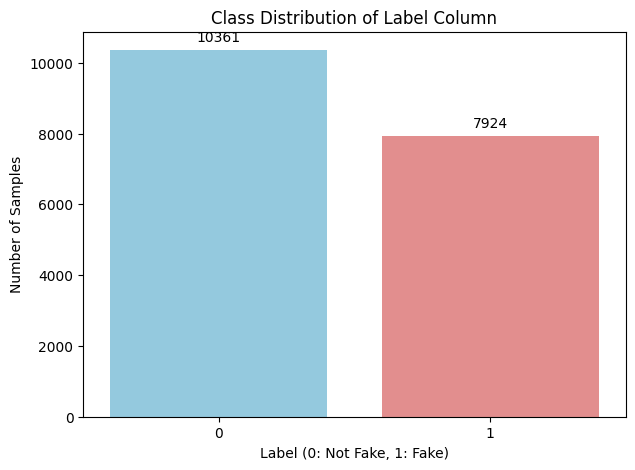

In [21]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=Y, hue=Y, palette=['skyblue', 'lightcoral'], legend=False) # Use a palette for different colors
plt.title('Class Distribution of Label Column')
plt.xlabel('Label (0: Not Fake, 1: Fake)')
plt.ylabel('Number of Samples')

# Add text labels inside each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

In [22]:
print("Class distribution in the 'label' column:")
display(Y.value_counts())

Class distribution in the 'label' column:


,count
label,
0,10361
1,7924


In [23]:
print("Percentage distribution of classes:")
display(Y.value_counts(normalize=True) * 100)

Percentage distribution of classes:


,proportion
label,
0,56.663932
1,43.336068


# Mentioning the size of the Vocabulary:

In [24]:
voc_size = 5000  # vovcabulary size

# Data Preprocessing:

The code `messages = X.copy()` is creating a new DataFrame called `messages` which is an independent copy of the DataFrame X. This is good practice because it means that any changes you make to `messages` won't accidentally alter your original data in X.

In [25]:
messages = X.copy()

In [26]:
messages['title']

,title
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired
3,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...
...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,Macy’s Is Said to Receive Takeover Approach by...
20798,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [27]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [28]:
messages.reset_index(inplace=True)

In [29]:
import nltk
import re
from nltk.corpus import stopwords

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
### Dataset Preprocessing


from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

# Visualize Text Length Distribution:

**Task**:

Calculate the length of the preprocessed text for each news title. Then, visualize the distribution of these text lengths for both 'fake' and 'not fake' news categories using a histogram or density plot.

---

**Subtask**:

Create a histogram or density plot to show the distribution of text lengths (after preprocessing) for both 'fake' and 'not fake' news. This can help us understand if there's a length bias or characteristic length for each class.

---

**Reasoning**:

First, I'll calculate the length of each preprocessed text in the 'corpus' and store it in a new list. This is the initial step to prepare the data for visualization.

In [32]:
text_lengths = [len(text.split()) for text in corpus]
print("Calculated text lengths for each preprocessed title.")

Calculated text lengths for each preprocessed title.


**Reasoning**:

Now that the text lengths have been calculated, I'll create a new pandas DataFrame by combining these lengths with the corresponding 'label' from the `Y` Series. This DataFrame will serve as the input for the visualization step.



In [33]:
text_lengths_df = pd.DataFrame({'text_length': text_lengths, 'label': Y})
print("Created DataFrame combining text lengths and labels.")

Created DataFrame combining text lengths and labels.


**Reasoning**:

To visualize the distribution of text lengths for 'fake' and 'not fake' news, I will use `seaborn.histplot` with the `text_lengths_df` DataFrame, distinguishing classes by color and adding appropriate labels and a title for clarity.



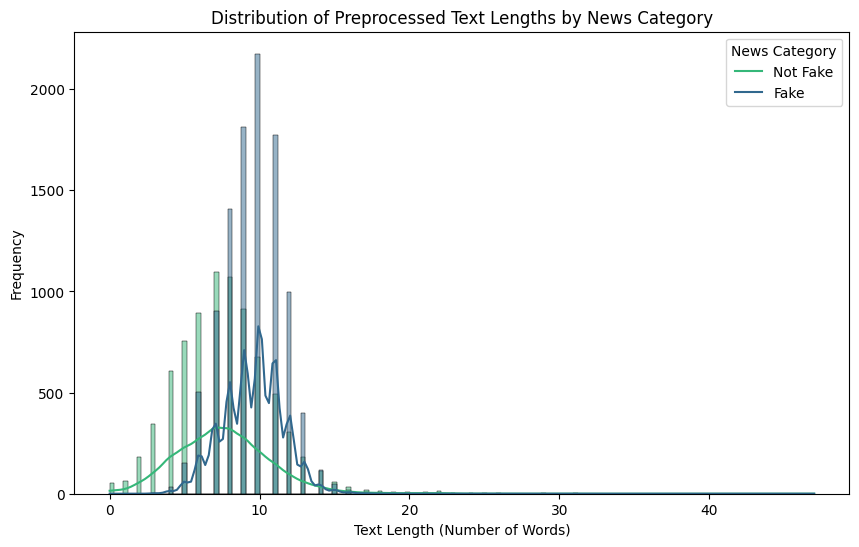

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=text_lengths_df, x='text_length', hue='label', kde=True, palette='viridis')
plt.title('Distribution of Preprocessed Text Lengths by News Category')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.legend(title='News Category', labels=['Not Fake', 'Fake'])
plt.show()

# Pre-processed text data is being displayed:

In [35]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

# One-Hot Representation:

In [36]:
onehot_repr = [one_hot(words, voc_size)for words in corpus]
onehot_repr

[[700, 2112, 3699, 2981, 4398, 4530, 502, 3887, 3415, 4773],
 [3236, 3581, 2224, 3363, 1534, 2757, 4679],
 [4489, 3972, 1814, 356],
 [2946, 805, 2898, 51, 2239, 2704],
 [1464, 1534, 2557, 3360, 2346, 3352, 1534, 2344, 3903, 4624],
 [35,
  1296,
  591,
  505,
  4540,
  1122,
  520,
  1922,
  3696,
  2127,
  567,
  530,
  574,
  3823,
  4679],
 [2725, 1019, 3559, 3446, 1105, 3647, 262, 1487, 4205, 4428, 271],
 [4668, 845, 2313, 2694, 3209, 1891, 1122, 1992, 4205, 4428, 271],
 [1370, 2737, 2995, 2131, 1108, 2627, 1704, 2099, 1122, 4960],
 [1621, 2822, 232, 2098, 1955, 4270, 3536, 585],
 [1079, 3256, 600, 2801, 1665, 4417, 2860, 4925, 1019, 2828, 3916],
 [51, 4279, 4398, 2627, 1122, 3209],
 [2422, 3216, 3022, 2220, 4354, 4491, 4305, 2789, 1084],
 [1424, 2950, 3588, 718, 171, 2224, 1501, 4205, 4428, 271],
 [2212, 2083, 3074, 517, 1870, 4205, 4428, 271],
 [3155, 1931, 986, 2196, 626, 4907, 828, 3751, 997, 2475],
 [3365, 654, 3581],
 [480, 848, 1780, 2206, 1122, 4989, 418, 4679],
 [1035, 1842

# Word Clouds for Top Words:


**Task**:

Generate separate word clouds for 'fake' and 'not fake' news titles to highlight the most frequently occurring words in each category, revealing characteristic vocabulary and themes.

---

**Reasoning**:

To generate separate word clouds, I need to first divide the preprocessed `corpus` into two lists: one containing titles classified as 'fake' (label 1) and another for 'not fake' (label 0), based on the corresponding `Y` labels.

In [37]:
fake_news_corpus = [corpus[i] for i, label in enumerate(Y) if label == 1]
not_fake_news_corpus = [corpus[i] for i, label in enumerate(Y) if label == 0]

print(f"Number of fake news titles: {len(fake_news_corpus)}")
print(f"Number of not fake news titles: {len(not_fake_news_corpus)}")

Number of fake news titles: 7924
Number of not fake news titles: 10361


**Reasoning**:

To create word clouds, the lists of preprocessed words for both 'fake' and 'not fake' news need to be joined into single strings. This will allow the WordCloud library to process the text effectively.



In [38]:
fake_news_text = " ".join(fake_news_corpus)
not_fake_news_text = " ".join(not_fake_news_corpus)

print("Joined fake news titles into a single string.")
print("Joined not fake news titles into a single string.")

Joined fake news titles into a single string.
Joined not fake news titles into a single string.


**Reasoning**:

Now that the texts for fake and not fake news are combined into single strings, I will import the `WordCloud` library, create and generate word clouds for each category, and then display them using `matplotlib.pyplot` to visualize the most frequent words.



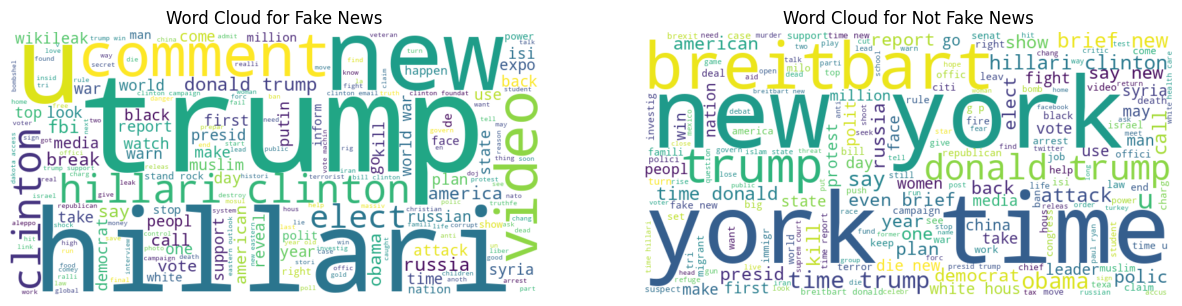

Generated and displayed word clouds for fake and not fake news.


In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for fake news
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news_text)

# Generate word cloud for not fake news
wordcloud_not_fake = WordCloud(width=800, height=400, background_color='white').generate(not_fake_news_text)

# Display the generated image:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_not_fake, interpolation='bilinear')
plt.title('Word Cloud for Not Fake News')
plt.axis('off')

plt.show()
print("Generated and displayed word clouds for fake and not fake news.")

# Word Embedding Represntation:

After doing `One-Hot Representation`, we notice that all the sentence length are different thet are not fixed. So, before giving it to the `Embedding Layer`, we need to make them of fixed length.

In [40]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen = sent_length)
print(embedded_docs)

[[   0    0    0 ... 3887 3415 4773]
 [   0    0    0 ... 1534 2757 4679]
 [   0    0    0 ... 3972 1814  356]
 ...
 [   0    0    0 ... 4205 4428  271]
 [   0    0    0 ... 2439 3837 2492]
 [   0    0    0 ... 3617 3292 4200]]


In [41]:
len(embedded_docs)

18285

In [42]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  700,
       2112, 3699, 2981, 4398, 4530,  502, 3887, 3415, 4773], dtype=int32)

# Creating Model:

In [43]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_length))
model.add(LSTM(100))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.build(input_shape=(None, sent_length))

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 20, 40)         │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        56,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,501 (1001.96 KB)

 Trainable params: 256,501 (1001.96 KB)

 Non-trainable params: 0 (0.00 B)

None


In [44]:
len(embedded_docs), Y.shape

(18285, (18285,))

In [45]:
import numpy as np

X_final = np.array(embedded_docs)
Y_final = np.array(Y)

In [46]:
# Check shapes

print("Shape of X_final:", X_final.shape)
print("Shape of Y_final:", Y_final.shape)

Shape of X_final: (18285, 20)
Shape of Y_final: (18285,)


# Splitting of Training Data & Testing Data:

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.33, random_state=42)

# Model Training:

In [48]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7960 - loss: 0.4223 - val_accuracy: 0.9110 - val_loss: 0.2009
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9392 - loss: 0.1491 - val_accuracy: 0.9210 - val_loss: 0.2112
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9651 - loss: 0.0924 - val_accuracy: 0.9206 - val_loss: 0.2193
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9755 - loss: 0.0696 - val_accuracy: 0.9170 - val_loss: 0.2502
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9831 - loss: 0.0522 - val_accuracy: 0.9140 - val_loss: 0.2678
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9875 - loss: 0.0431 - val_accuracy: 0.9092 - val_loss: 0.3399
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9918 - loss: 0.0285 - val_accuracy: 0.9019 - val_loss: 0.3007
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9942 - loss: 0.0250 - val_accuracy: 0

# Plot Training History:

**Task**:

Plot the training and validation accuracy and loss over the epochs. This visualization is crucial for diagnosing overfitting or underfitting and understanding the model's learning process over time.

---

**Reasoning**:

Now that the model has been trained and its history captured, I will extract the accuracy and loss values for both training and validation sets from the `history` object. Then, I will create two subplots to visualize these metrics over the epochs, which is essential for evaluating the model's performance and identifying potential overfitting or underfitting.



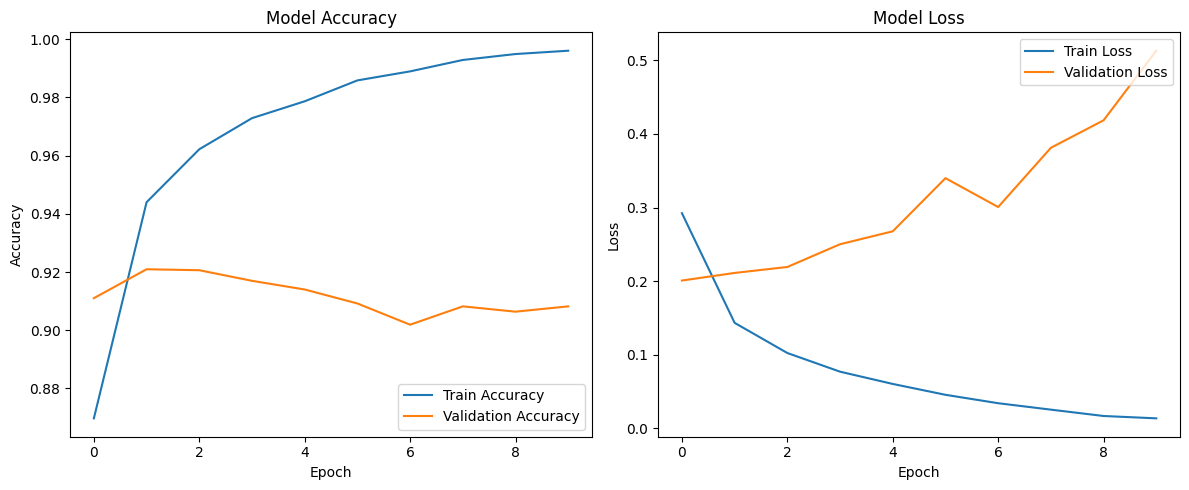

Plotted training and validation accuracy and loss over epochs.


In [49]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
print("Plotted training and validation accuracy and loss over epochs.")

# Adding of Dropout Layer:

In [50]:
from tensorflow.keras.layers import Dropout

## Creating model
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation=  'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.build(input_shape=(None, sent_length))

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 20, 40)         │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 40)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        56,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,501 (1001.96 KB)

 Trainable params: 256,501 (1001.96 KB)

 Non-trainable params: 0 (0.00 B)

None


# Performance Metrics And Accuracy:

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [52]:
Y_pred = (model.predict(X_test) > 0.5).astype("int32")

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [53]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.61      0.59      3419
           1       0.44      0.40      0.41      2616

    accuracy                           0.52      6035
   macro avg       0.50      0.50      0.50      6035
weighted avg       0.51      0.52      0.51      6035



In [54]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix:
[[2081 1338]
 [1581 1035]]


In [55]:
print("Accuracy Score:", accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.516321458160729


# Plot ROC Curve:

**Task**:

Generate a Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) score to further evaluate the model's performance. This helps visualize the trade-off between the true positive rate and false positive rate across different classification thresholds.

---

**Reasoning**:

First, I will predict the probabilities of the positive class for the test data using the trained model. This is the necessary input for computing the ROC curve.



In [56]:
Y_pred_proba = model.predict(X_test)
print("Predicted probabilities on the test set.")

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted probabilities on the test set.


**Reasoning**:

Now that the model has predicted probabilities, I will compute the ROC curve (false positive rates, true positive rates) and the Area Under the Curve (AUC) score using `sklearn.metrics` functions. This data will then be used for plotting.



In [57]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Computed ROC curve and AUC score: {roc_auc:.2f}")

Computed ROC curve and AUC score: 0.47


**Reasoning**:

With the ROC curve data and AUC score computed, I will now use `matplotlib.pyplot` to plot the ROC curve, including a diagonal reference line, axis labels, and a title that displays the AUC score, as instructed.



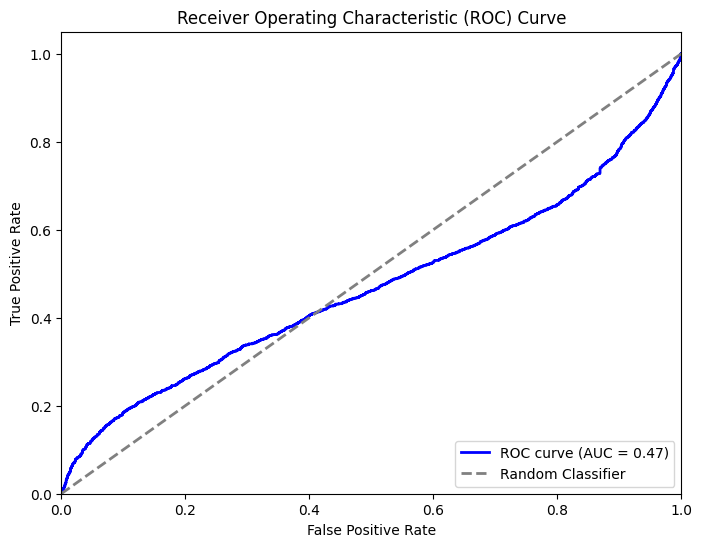

Plotted the ROC curve with AUC score.


In [58]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print("Plotted the ROC curve with AUC score.")